In [100]:
# clear all the variables
%reset -f

In [1]:
# import the relevant libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import norm

# for debugging, uncomment the following line
#from IPython.core.debugger import Tracer as tr
# to call trace, tr()()

ImportError: No module named statsmodels.api

In [102]:
# read data from a csv file
path = "H:\data\spy_ko.csv"
df = pd.read_csv(path, sep=',', )

# compute the log returns
df['KO'] = np.log(df['KO']) - np.log(df['KO'].shift(1))
df['SPY'] = np.log(df['SPY']) - np.log(df['SPY'].shift(1))

# drop NaNs
df = df.dropna()

# data summary + bof, eof check
print("data summary:\n {0} \n".format(df.describe()))
print("sample:\n {0}".format(pd.concat([df.head(5), df.tail(5)])))

data summary:
                SPY           KO
count  6016.000000  6016.000000
mean     -0.000346    -0.000316
std       0.011780     0.014093
min      -0.135577    -0.129971
25%      -0.005879    -0.007210
50%      -0.000673    -0.000238
75%       0.004705     0.006572
max       0.103637     0.110720 

sample:
             Date       SPY        KO
1     12/15/2016  0.001958 -0.004562
2     12/14/2016 -0.004109 -0.008217
3     12/13/2016  0.008289  0.013258
4     12/12/2016 -0.006652  0.003347
5      12/9/2016  0.001148  0.002384
6012    2/4/1993  0.000696  0.012048
6013    2/3/1993 -0.004175  0.002990
6014    2/2/1993 -0.010516  0.005952
6015    2/1/1993 -0.002115  0.020559
6016   1/29/1993 -0.007087 -0.014642


In [103]:
# run the linear regression model. smf allows some syntaxic sugar...
mod = smf.ols(formula='KO~SPY', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     KO   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1883.
Date:                Wed, 21 Dec 2016   Prob (F-statistic):               0.00
Time:                        16:17:27   Log-Likelihood:                 17924.
No. Observations:                6016   AIC:                        -3.584e+04
Df Residuals:                    6014   BIC:                        -3.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0001      0.000     -0.714      0.4

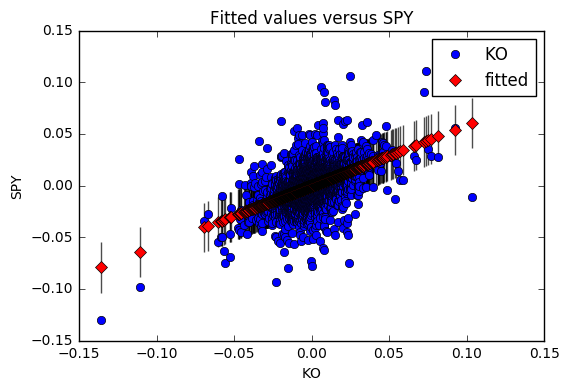

In [104]:
# plot the results
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(res, 1, ax=ax)
ax.set_ylabel("SPY")
ax.set_xlabel("KO")
plt.show()